<a href="https://colab.research.google.com/github/fjadidi2001/Cyber-Attack-Detection/blob/main/Satellite_Image_Analysis_for_Environmental_Monitoring_Using_Classical_Computer_Vision_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 790.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("umeradnaan/remote-sensing-satellite-images")

print("Path to dataset files:", path)

100%|██████████| 49.9M/49.9M [00:00<00:00, 244MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/umeradnaan/remote-sensing-satellite-images/versions/1


In [7]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/umeradnaan/remote-sensing-satellite-images/versions/1"
for root, dirs, files in os.walk(dataset_path):
    print(f"Directory: {root}")
    print(f"Subdirectories: {dirs}")
    print(f"Files: {len(files)} files")

Directory: /root/.cache/kagglehub/datasets/umeradnaan/remote-sensing-satellite-images/versions/1
Subdirectories: ['Remote Sensing Data.v2i.yolov8']
Files: 0 files
Directory: /root/.cache/kagglehub/datasets/umeradnaan/remote-sensing-satellite-images/versions/1/Remote Sensing Data.v2i.yolov8
Subdirectories: ['train', 'valid', 'test']
Files: 3 files
Directory: /root/.cache/kagglehub/datasets/umeradnaan/remote-sensing-satellite-images/versions/1/Remote Sensing Data.v2i.yolov8/train
Subdirectories: ['images', 'labels']
Files: 0 files
Directory: /root/.cache/kagglehub/datasets/umeradnaan/remote-sensing-satellite-images/versions/1/Remote Sensing Data.v2i.yolov8/train/images
Subdirectories: []
Files: 700 files
Directory: /root/.cache/kagglehub/datasets/umeradnaan/remote-sensing-satellite-images/versions/1/Remote Sensing Data.v2i.yolov8/train/labels
Subdirectories: []
Files: 700 files
Directory: /root/.cache/kagglehub/datasets/umeradnaan/remote-sensing-satellite-images/versions/1/Remote Sensing

Displaying an image from: /root/.cache/kagglehub/datasets/umeradnaan/remote-sensing-satellite-images/versions/1/Remote Sensing Data.v2i.yolov8/train/images


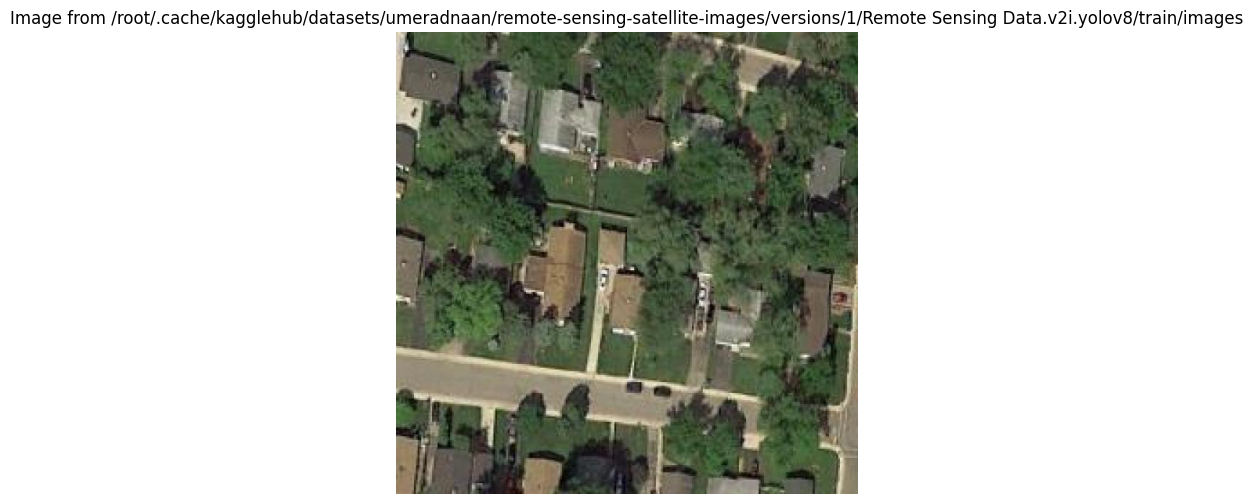

Displaying an image from: /root/.cache/kagglehub/datasets/umeradnaan/remote-sensing-satellite-images/versions/1/Remote Sensing Data.v2i.yolov8/valid/images


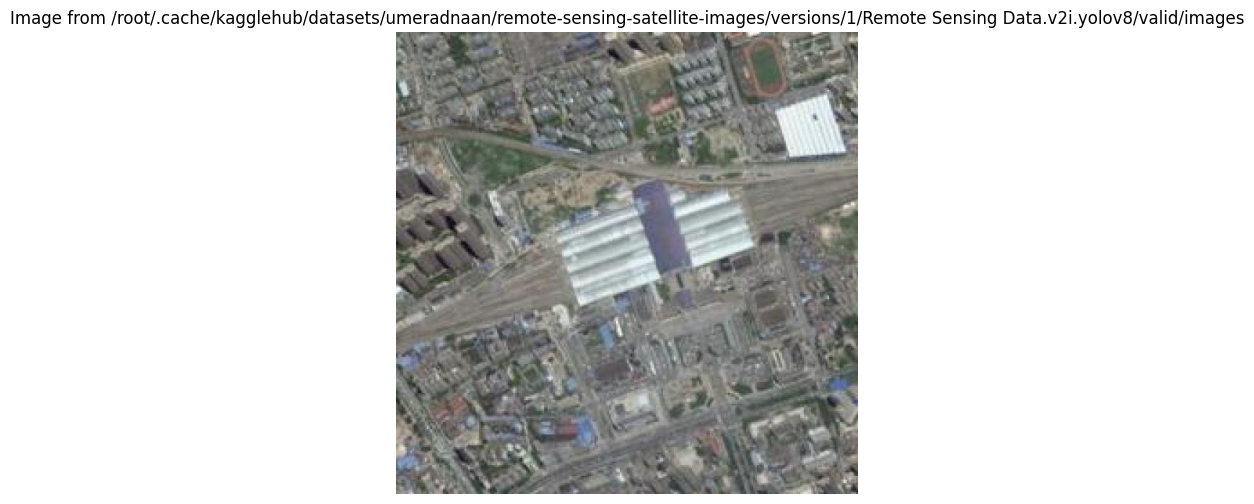

Displaying an image from: /root/.cache/kagglehub/datasets/umeradnaan/remote-sensing-satellite-images/versions/1/Remote Sensing Data.v2i.yolov8/test/images


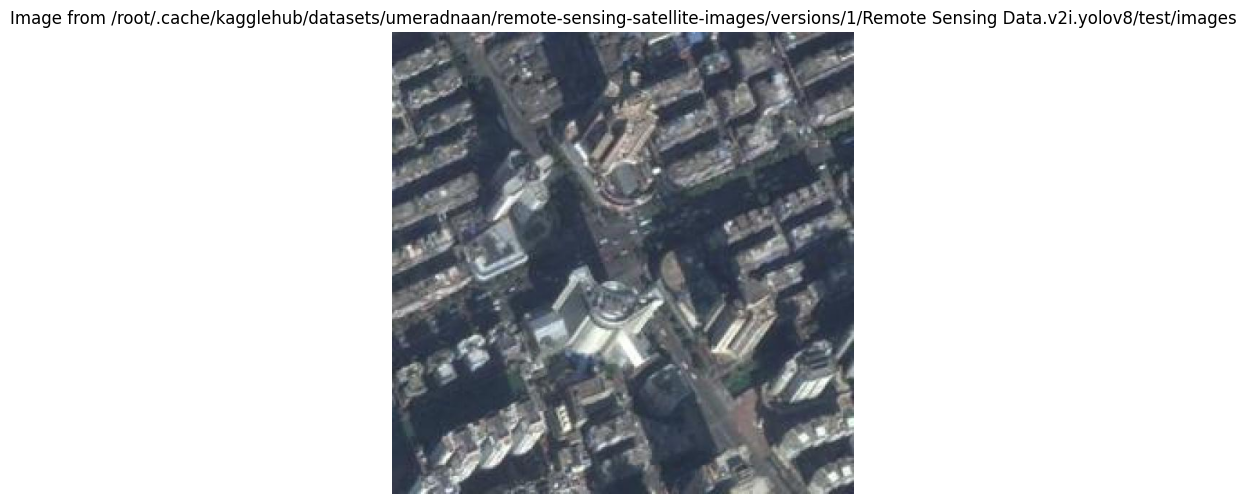

In [8]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the dataset path
dataset_path = "/root/.cache/kagglehub/datasets/umeradnaan/remote-sensing-satellite-images/versions/1"

# Supported image extensions
image_extensions = ('.jpg', '.jpeg', '.png')

# Function to display one image from a directory
def display_image_from_dir(directory):
    for file in os.listdir(directory):
        if file.lower().endswith(image_extensions):
            img_path = os.path.join(directory, file)
            img = Image.open(img_path)
            plt.figure(figsize=(6, 6))
            plt.imshow(img)
            plt.title(f"Image from {directory}")
            plt.axis('off')
            plt.show()
            break  # Display only one image per directory

# Iterate through all subdirectories
for root, dirs, files in os.walk(dataset_path):
    if any(file.lower().endswith(image_extensions) for file in files):
        print(f"Displaying an image from: {root}")
        display_image_from_dir(root)

In [10]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/umeradnaan/remote-sensing-satellite-images/versions/1"
for root, dirs, files in os.walk(dataset_path):
    print(f"Directory: {root}")
    print(f"Subdirectories: {dirs}")
    print(f"Files: {len(files)} files")

Directory: /root/.cache/kagglehub/datasets/umeradnaan/remote-sensing-satellite-images/versions/1
Subdirectories: ['Remote Sensing Data.v2i.yolov8']
Files: 0 files
Directory: /root/.cache/kagglehub/datasets/umeradnaan/remote-sensing-satellite-images/versions/1/Remote Sensing Data.v2i.yolov8
Subdirectories: ['train', 'valid', 'test']
Files: 3 files
Directory: /root/.cache/kagglehub/datasets/umeradnaan/remote-sensing-satellite-images/versions/1/Remote Sensing Data.v2i.yolov8/train
Subdirectories: ['images', 'labels']
Files: 0 files
Directory: /root/.cache/kagglehub/datasets/umeradnaan/remote-sensing-satellite-images/versions/1/Remote Sensing Data.v2i.yolov8/train/images
Subdirectories: []
Files: 700 files
Directory: /root/.cache/kagglehub/datasets/umeradnaan/remote-sensing-satellite-images/versions/1/Remote Sensing Data.v2i.yolov8/train/labels
Subdirectories: []
Files: 700 files
Directory: /root/.cache/kagglehub/datasets/umeradnaan/remote-sensing-satellite-images/versions/1/Remote Sensing

In [11]:
import os
import cv2
import numpy as np

# Define dataset path and supported image extensions
dataset_path = "/root/.cache/kagglehub/datasets/umeradnaan/remote-sensing-satellite-images/versions/1"
image_extensions = ('.jpg', '.jpeg', '.png')

# Dictionary to store images by directory
images_by_dir = {}

# Walk through dataset directory
for root, _, files in os.walk(dataset_path):
    # Filter image files
    image_files = [f for f in files if f.lower().endswith(image_extensions)]
    if image_files:
        images = []
        for file in image_files:
            img_path = os.path.join(root, file)
            # Load image as NumPy array (BGR format by default in OpenCV)
            img = cv2.imread(img_path)
            if img is not None:
                images.append((file, img))
            else:
                print(f"Failed to load: {img_path}")
        if images:
            images_by_dir[root] = images
            print(f"Loaded {len(images)} images from {root}")

# Example: Print shape of the first image in each directory
for directory, img_list in images_by_dir.items():
    if img_list:
        file_name, first_img = img_list[0]
        print(f"Directory: {directory}, Image: {file_name}, Shape: {first_img.shape}")

Loaded 700 images from /root/.cache/kagglehub/datasets/umeradnaan/remote-sensing-satellite-images/versions/1/Remote Sensing Data.v2i.yolov8/train/images
Loaded 200 images from /root/.cache/kagglehub/datasets/umeradnaan/remote-sensing-satellite-images/versions/1/Remote Sensing Data.v2i.yolov8/valid/images
Loaded 100 images from /root/.cache/kagglehub/datasets/umeradnaan/remote-sensing-satellite-images/versions/1/Remote Sensing Data.v2i.yolov8/test/images
Directory: /root/.cache/kagglehub/datasets/umeradnaan/remote-sensing-satellite-images/versions/1/Remote Sensing Data.v2i.yolov8/train/images, Image: 364_jpg.rf.07671e0808b76972bea23769a36a779b.jpg, Shape: (640, 640, 3)
Directory: /root/.cache/kagglehub/datasets/umeradnaan/remote-sensing-satellite-images/versions/1/Remote Sensing Data.v2i.yolov8/valid/images, Image: 724_jpg.rf.3081ae91b1a638b7158bd174e2bdb50b.jpg, Shape: (640, 640, 3)
Directory: /root/.cache/kagglehub/datasets/umeradnaan/remote-sensing-satellite-images/versions/1/Remote 

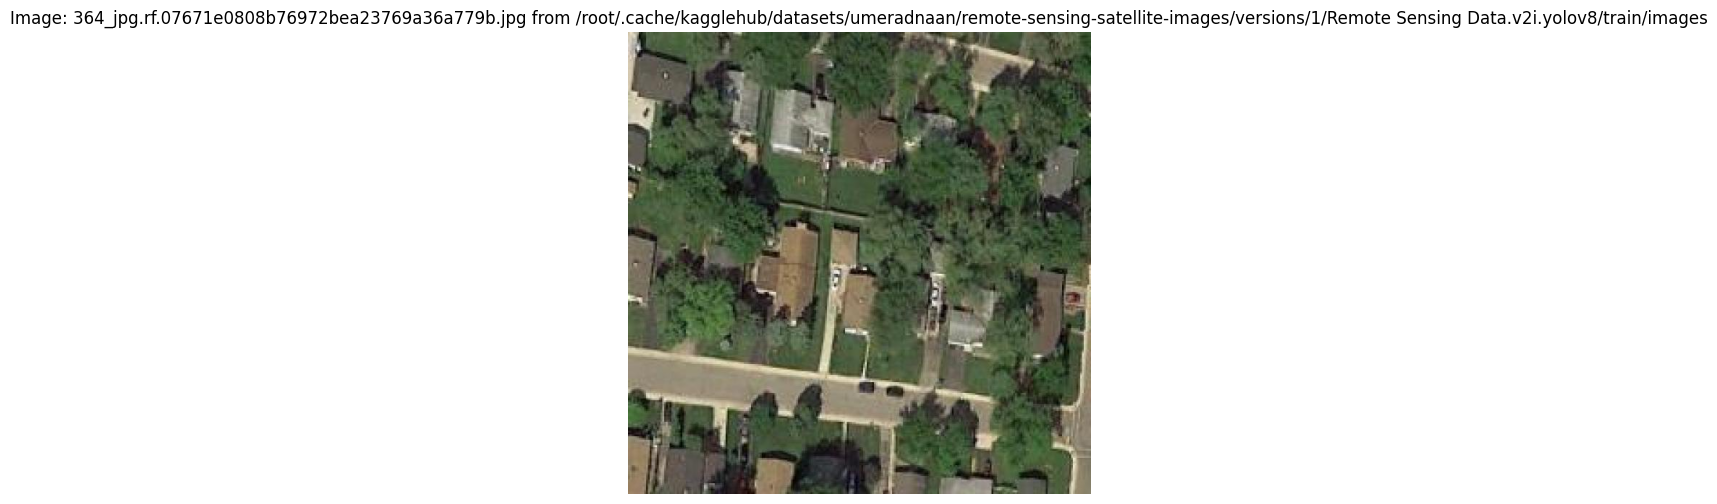

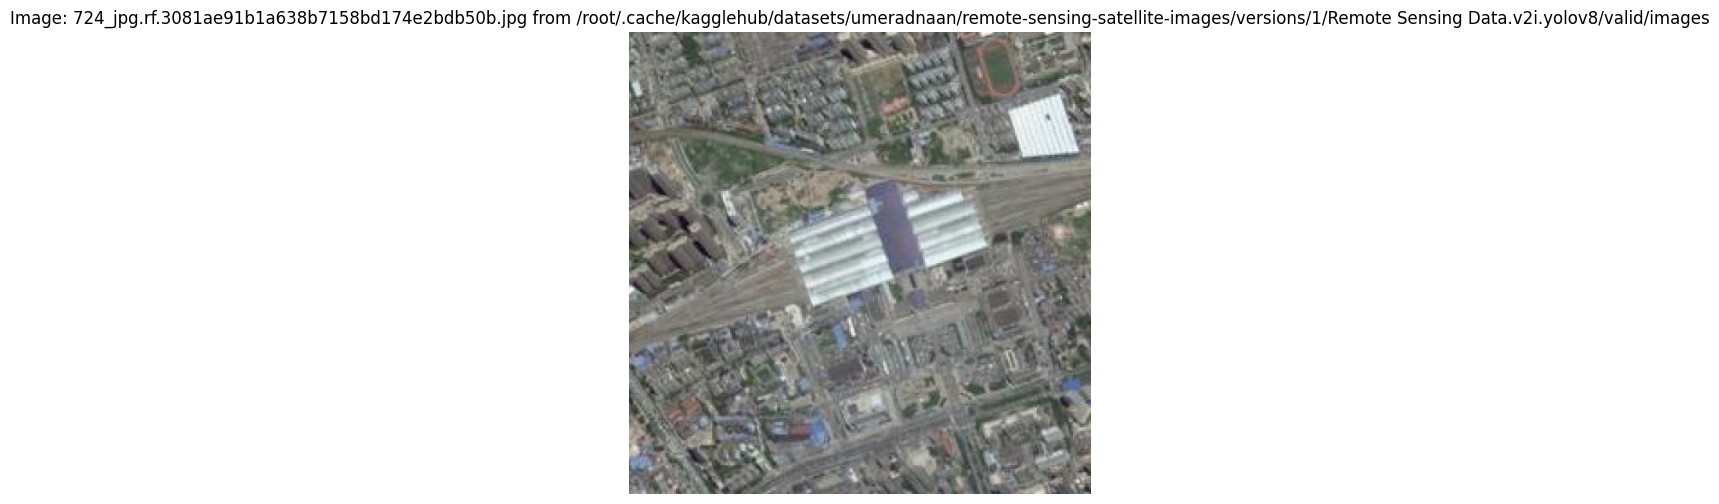

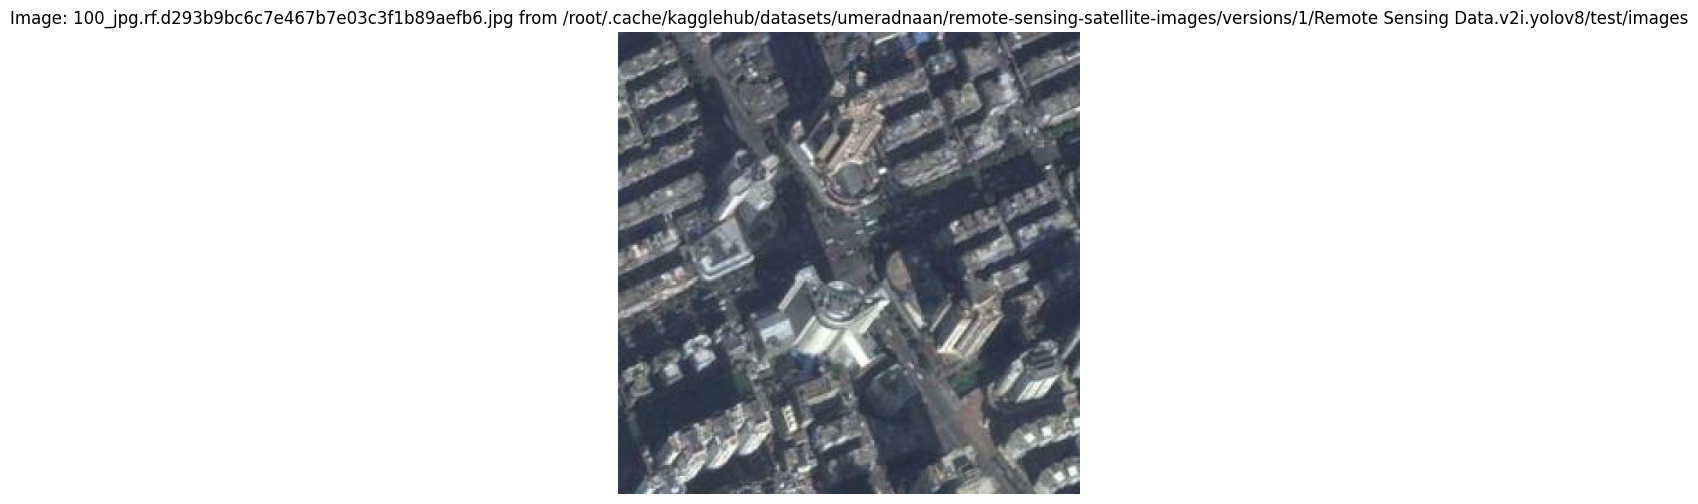

In [12]:
import matplotlib.pyplot as plt

for directory, img_list in images_by_dir.items():
    if img_list:
        file_name, img = img_list[0]
        # Convert BGR (OpenCV) to RGB (Matplotlib)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(6, 6))
        plt.imshow(img_rgb)
        plt.title(f"Image: {file_name} from {directory}")
        plt.axis('off')
        plt.show()

# 1

Path to dataset files: /kaggle/input/remote-sensing-satellite-images

DATASET STRUCTURE
remote-sensing-satellite-images/
  Remote Sensing Data.v2i.yolov8/
    README.dataset.txt
    README.roboflow.txt
    data.yaml
    valid/
      labels/
        332_jpg.rf.82572427506bb0314745efb56ffdbef7.txt
        539_jpg.rf.a48c85cb3d29efd40c05b75afaf3d733.txt
        782_jpg.rf.d085bc46ccccfd4cb2d23d498f38aea2.txt
        156_jpg.rf.5641c535b1ad00a956046413d887d707.txt
        671_jpg.rf.3e664cfb0e8e9c99db8216997badf0ae.txt
        ... and 195 more files
      images/
        278_jpg.rf.5fe267b173bb72b6d5ed498208b3c8f6.jpg
        144_jpg.rf.c4d0be2f5f249005ca79188130d38fd1.jpg
        007_jpg.rf.2c27750dfeb2de3ad3bd6368e7aadfd7.jpg
        356_jpg.rf.70df0381d19b9e64947342747cf238e1.jpg
        738_jpg.rf.b4d6b7fc5ad2d974d9aa14d9c5ee0529.jpg
        ... and 195 more files
    test/
      labels/
        045_jpg.rf.243826a07b59b16c0e494a33ca20cd1a.txt
        701_jpg.rf.48847598caac71f0617bd563

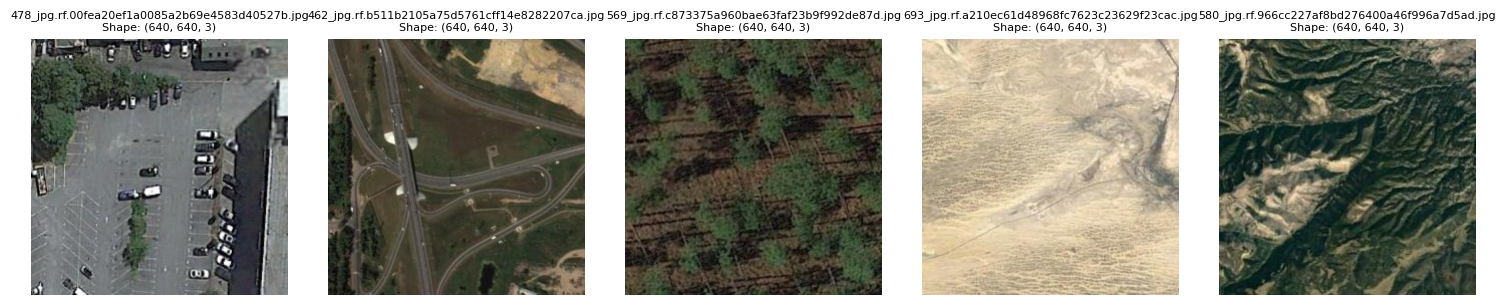

Loaded 5 images from images
  1. 478_jpg.rf.00fea20ef1a0085a2b69e4583d40527b.jpg: (640, 640, 3) - dtype: uint8
  2. 462_jpg.rf.b511b2105a75d5761cff14e8282207ca.jpg: (640, 640, 3) - dtype: uint8
  3. 569_jpg.rf.c873375a960bae63faf23b9f992de87d.jpg: (640, 640, 3) - dtype: uint8
  4. 693_jpg.rf.a210ec61d48968fc7623c23629f23cac.jpg: (640, 640, 3) - dtype: uint8
  5. 580_jpg.rf.966cc227af8bd276400a46f996a7d5ad.jpg: (640, 640, 3) - dtype: uint8

DISPLAYING IMAGES FROM: images


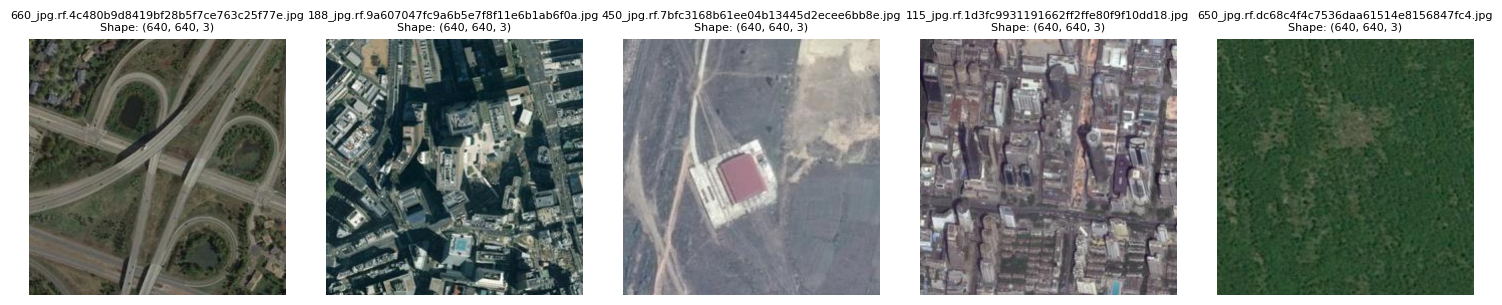

Loaded 5 images from images
  1. 660_jpg.rf.4c480b9d8419bf28b5f7ce763c25f77e.jpg: (640, 640, 3) - dtype: uint8
  2. 188_jpg.rf.9a607047fc9a6b5e7f8f11e6b1ab6f0a.jpg: (640, 640, 3) - dtype: uint8
  3. 450_jpg.rf.7bfc3168b61ee04b13445d2ecee6bb8e.jpg: (640, 640, 3) - dtype: uint8
  4. 115_jpg.rf.1d3fc9931191662ff2ffe80f9f10dd18.jpg: (640, 640, 3) - dtype: uint8
  5. 650_jpg.rf.dc68c4f4c7536daa61514e8156847fc4.jpg: (640, 640, 3) - dtype: uint8

DISPLAYING IMAGES FROM: images


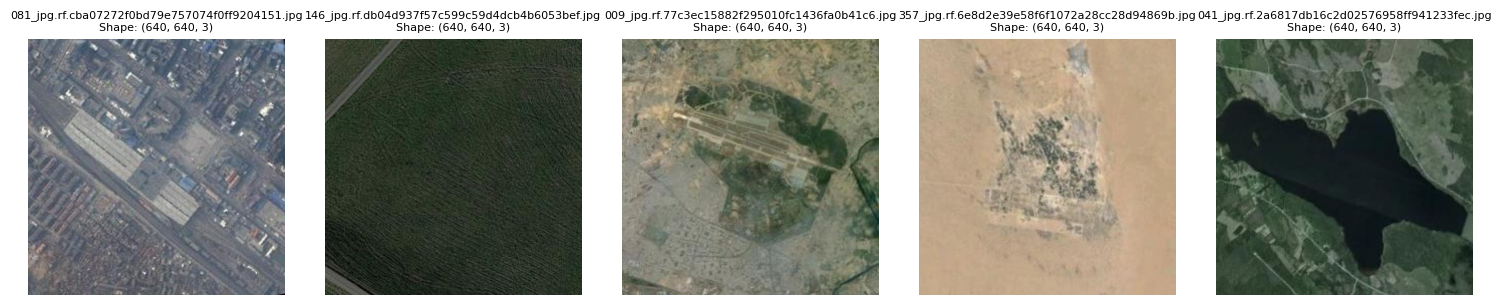

Loaded 5 images from images
  1. 081_jpg.rf.cba07272f0bd79e757074f0ff9204151.jpg: (640, 640, 3) - dtype: uint8
  2. 146_jpg.rf.db04d937f57c599c59d4dcb4b6053bef.jpg: (640, 640, 3) - dtype: uint8
  3. 009_jpg.rf.77c3ec15882f295010fc1436fa0b41c6.jpg: (640, 640, 3) - dtype: uint8
  4. 357_jpg.rf.6e8d2e39e58f6f1072a28cc28d94869b.jpg: (640, 640, 3) - dtype: uint8
  5. 041_jpg.rf.2a6817db16c2d02576958ff941233fec.jpg: (640, 640, 3) - dtype: uint8

DATASET SUMMARY
Total directories: 3
Total images: 1000

Per directory breakdown:
  images: 200 images, Sample shape: (640, 640, 3)
  images: 100 images, Sample shape: (640, 640, 3)
  images: 700 images, Sample shape: (640, 640, 3)

DATASET LOADING COMPLETE!
Next steps:
1. Use the loaded images for your computer vision tasks
2. Apply preprocessing using the preprocess_images() function
3. Split data into train/validation/test sets as needed
4. Train your YOLOv8 or other models


In [2]:
# Remote Sensing Dataset Loading and Visualization in Google Colab

# Step 1: Install required packages
!pip install kagglehub

# Step 2: Import necessary libraries
import kagglehub
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import random
from pathlib import Path

# Step 3: Download the dataset
print("Downloading Remote Sensing Dataset...")
path = kagglehub.dataset_download("umeradnaan/remote-sensing-satellite-images")
print("Path to dataset files:", path)

# Step 4: Explore dataset structure
def explore_dataset_structure(dataset_path):
    """Explore and print the structure of the dataset"""
    print("\n" + "="*50)
    print("DATASET STRUCTURE")
    print("="*50)

    for root, dirs, files in os.walk(dataset_path):
        level = root.replace(dataset_path, '').count(os.sep)
        indent = ' ' * 2 * level
        print(f"{indent}{os.path.basename(root)}/")

        # Print first few files in each directory
        subindent = ' ' * 2 * (level + 1)
        for i, file in enumerate(files[:5]):  # Show first 5 files
            print(f"{subindent}{file}")
        if len(files) > 5:
            print(f"{subindent}... and {len(files) - 5} more files")

explore_dataset_structure(path)

# Step 5: Find image directories
def find_image_directories(dataset_path):
    """Find all directories containing images"""
    image_dirs = []
    image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.tif'}

    for root, dirs, files in os.walk(dataset_path):
        # Check if directory contains image files
        has_images = any(Path(f).suffix.lower() in image_extensions for f in files)
        if has_images:
            image_dirs.append(root)

    return image_dirs

image_directories = find_image_directories(path)
print(f"\nFound {len(image_directories)} directories with images:")
for i, dir_path in enumerate(image_directories):
    dir_name = os.path.basename(dir_path)
    num_files = len([f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))])
    print(f"{i+1}. {dir_name}: {num_files} files")

# Step 6: Load images using numpy
def load_image_as_numpy(image_path):
    """Load an image and convert to numpy array"""
    try:
        # Open image using PIL
        img = Image.open(image_path)
        # Convert to RGB if necessary (handles different formats)
        if img.mode != 'RGB':
            img = img.convert('RGB')
        # Convert to numpy array
        img_array = np.array(img)
        return img_array
    except Exception as e:
        print(f"Error loading {image_path}: {e}")
        return None

def get_images_from_directory(directory_path, num_images=5):
    """Get a specified number of random images from a directory"""
    image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.tif'}

    # Get all image files
    image_files = [f for f in os.listdir(directory_path)
                   if Path(f).suffix.lower() in image_extensions]

    # Select random images (or all if less than requested)
    selected_files = random.sample(image_files, min(num_images, len(image_files)))

    images = []
    filenames = []

    for filename in selected_files:
        img_path = os.path.join(directory_path, filename)
        img_array = load_image_as_numpy(img_path)
        if img_array is not None:
            images.append(img_array)
            filenames.append(filename)

    return images, filenames

# Step 7: Display images from each directory
def display_images_from_directories(image_directories, images_per_dir=5):
    """Display images from each directory"""

    for dir_path in image_directories:
        dir_name = os.path.basename(dir_path)
        print(f"\n" + "="*60)
        print(f"DISPLAYING IMAGES FROM: {dir_name}")
        print("="*60)

        # Load images
        images, filenames = get_images_from_directory(dir_path, images_per_dir)

        if not images:
            print("No images found or failed to load images from this directory")
            continue

        # Create subplot
        fig, axes = plt.subplots(1, len(images), figsize=(15, 3))
        if len(images) == 1:
            axes = [axes]

        for idx, (img, filename) in enumerate(zip(images, filenames)):
            axes[idx].imshow(img)
            axes[idx].set_title(f"{filename}\nShape: {img.shape}", fontsize=8)
            axes[idx].axis('off')

        # Hide unused subplots
        for idx in range(len(images), len(axes)):
            axes[idx].axis('off')

        plt.tight_layout()
        plt.show()

        # Print image statistics
        print(f"Loaded {len(images)} images from {dir_name}")
        for i, (img, filename) in enumerate(zip(images, filenames)):
            print(f"  {i+1}. {filename}: {img.shape} - dtype: {img.dtype}")

# Step 8: Execute the visualization
print("\n" + "="*60)
print("STARTING IMAGE VISUALIZATION")
print("="*60)

display_images_from_directories(image_directories, images_per_dir=5)

# Step 9: Optional - Create a summary of the dataset
def dataset_summary(image_directories):
    """Create a summary of the dataset"""
    print("\n" + "="*60)
    print("DATASET SUMMARY")
    print("="*60)

    total_images = 0
    summary_data = []

    for dir_path in image_directories:
        dir_name = os.path.basename(dir_path)
        image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.tif'}

        image_files = [f for f in os.listdir(dir_path)
                      if Path(f).suffix.lower() in image_extensions]

        num_images = len(image_files)
        total_images += num_images

        # Sample one image to get dimensions
        if image_files:
            sample_img = load_image_as_numpy(os.path.join(dir_path, image_files[0]))
            if sample_img is not None:
                img_shape = sample_img.shape
            else:
                img_shape = "Could not load"
        else:
            img_shape = "No images"

        summary_data.append({
            'directory': dir_name,
            'count': num_images,
            'sample_shape': img_shape
        })

    print(f"Total directories: {len(image_directories)}")
    print(f"Total images: {total_images}")
    print("\nPer directory breakdown:")
    for data in summary_data:
        print(f"  {data['directory']}: {data['count']} images, Sample shape: {data['sample_shape']}")

dataset_summary(image_directories)

# Step 10: Optional - Preprocessing function
def preprocess_images(images, target_size=(224, 224), normalize=True):
    """
    Preprocess images for machine learning

    Args:
        images: List of numpy arrays
        target_size: Tuple of (height, width) for resizing
        normalize: Whether to normalize pixel values to [0, 1]

    Returns:
        Preprocessed numpy array of shape (n_images, height, width, channels)
    """
    preprocessed = []

    for img in images:
        # Resize image
        img_pil = Image.fromarray(img)
        img_resized = img_pil.resize(target_size)
        img_array = np.array(img_resized)

        # Normalize if requested
        if normalize:
            img_array = img_array.astype(np.float32) / 255.0

        preprocessed.append(img_array)

    return np.array(preprocessed)

print("\n" + "="*60)
print("DATASET LOADING COMPLETE!")
print("="*60)
print("Next steps:")
print("1. Use the loaded images for your computer vision tasks")
print("2. Apply preprocessing using the preprocess_images() function")
print("3. Split data into train/validation/test sets as needed")
print("4. Train your YOLOv8 or other models")

In [4]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/remote-sensing-satellite-images/Remote Sensing Data.v2i.yolov8/README.dataset.txt
/kaggle/input/remote-sensing-satellite-images/Remote Sensing Data.v2i.yolov8/README.roboflow.txt
/kaggle/input/remote-sensing-satellite-images/Remote Sensing Data.v2i.yolov8/data.yaml
/kaggle/input/remote-sensing-satellite-images/Remote Sensing Data.v2i.yolov8/valid/labels/332_jpg.rf.82572427506bb0314745efb56ffdbef7.txt
/kaggle/input/remote-sensing-satellite-images/Remote Sensing Data.v2i.yolov8/valid/labels/539_jpg.rf.a48c85cb3d29efd40c05b75afaf3d733.txt
/kaggle/input/remote-sensing-satellite-images/Remote Sensing Data.v2i.yolov8/valid/labels/782_jpg.rf.d085bc46ccccfd4cb2d23d498f38aea2.txt
/kaggle/input/remote-sensing-satellite-images/Remote Sensing Data.v2i.yolov8/valid/labels/156_jpg.rf.5641c535b1ad00a956046413d887d707.txt
/kaggle/input/remote-sensing-satellite-images/Remote Sensing Data.v2i.yolov8/valid/labels/671_jpg.rf.3e664cfb0e8e9c99db8216997badf0ae.txt
/kaggle/input/remote-sensing-s